# MANASI JADHAV

# GRIP DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP


# Task 1 : Prediction using Supervised ML (Linear Regression)

# Statement: Predict the percentage of an student based on the no. of study hours.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

# Visualizing data

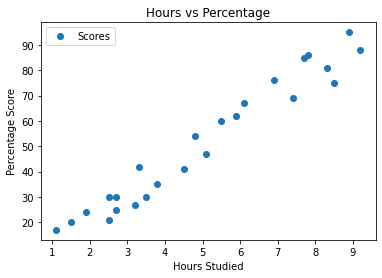

In [6]:
#Plotting the distribution of scores

data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()


The above graph shows a positive linear relationship between the "No.of Hours studied " and "Percentage of Scores"

# Preparing the data and Train-Test-Splitting

In [7]:
X = data.iloc[: , 0:1].values  #1st column of data is X
Y = data.iloc[:,1].values  #2nd column of data is Y

In [8]:
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86], dtype=int64))

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print(f"Rows in X train set :{len(X_train)} \n Rows in X test set:{len(X_test)}")
print(f"Rows in Y train set :{len(Y_train)} \n Rows in Y test set:{len(Y_test)}")
# Data is split in 80(train):20(test) ratio.

Rows in X train set :20 
 Rows in X test set:5
Rows in Y train set :20 
 Rows in Y test set:5


In [10]:
print("X train.shape =", X_train.shape)
print("Y train.shape =", Y_train.shape)
print("X test.shape  =", X_test.shape)
print("Y test.shape  =", Y_test.shape)

X train.shape = (20, 1)
Y train.shape = (20,)
X test.shape  = (5, 1)
Y test.shape  = (5,)


# Training the model

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [12]:
#Fitting the training data
model.fit(X_train,Y_train)
print("Training is done")

Training is done


B0 = 2.82689235389973 
B1 = [9.68207815]


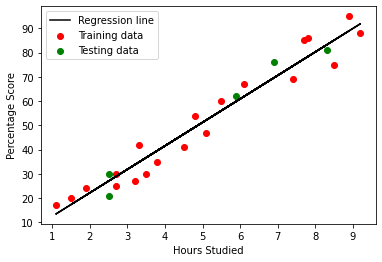

In [13]:
print("B0 =",model.intercept_,"\nB1 =",model.coef_) # B0 is Intercept & Slope of the line is B1.,"

# Plotting the linear regression line in the format y=mx+b 
line = model.coef_*X+ model.intercept_

# Plotting on test data
plt.scatter(X_train, Y_train,color="red",label="Training data")
plt.scatter(X_test,Y_test,color="green",label="Testing data")
plt.plot(X, line, color='black' ,label="Regression line");
plt.legend(loc="upper left")
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.show()

# Testing the model on test data set and making predictions

In [14]:
print("Testing data")
print(X_test)

Testing data
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


# Evaluating the model

In [15]:
Y_pred=model.predict(X_test)##predicting the Scores for test data
print(Y_pred)

#now print the Y_test.
Y_test

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


array([81, 30, 21, 76, 62], dtype=int64)

In [16]:
#comparing the predicitng scores with actual scores
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
print(df)

   Actual  Predicted
0      81  83.188141
1      30  27.032088
2      21  27.032088
3      76  69.633232
4      62  59.951153


# Accuracy of the model

In [17]:
from sklearn import metrics
metrics.r2_score(Y_test,Y_pred)

0.9678055545167993

# Predicting the Error

In [18]:
from sklearn.metrics import mean_squared_error
MSE = metrics.mean_squared_error(Y_test,Y_pred)
root_E = np.sqrt(metrics.mean_squared_error(Y_test,Y_pred))
print("Mean Squared Error      = ",MSE)
print("Root Mean Squared Error = ",root_E)

Mean Squared Error      =  18.943211722315283
Root Mean Squared Error =  4.352380006653289


# Predicting the score

In [19]:
Prediction_score = model.predict([[9.25]])
print("Predicted score for a student studying 9.25 hours :",Prediction_score)

Predicted score for a student studying 9.25 hours : [92.38611528]


# From above result, it can be predicted that if a student studies for 9.25 hours/day then the student will score 92.38%.